# Classification of chronic kidney desease

In [2]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *

In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Processing(path):
    """

    Clean the data by replacing the na_values by the mean 
    of the associated column. Take the path as argument.
    """
    data = pd.read_csv(path, na_values='?')
    for i in data.columns:
        for j in data[i]:
            if(isinstance(j,str)):
                l = [x for x in data[i].unique() if str(x) != 'nan']
                le = LabelEncoder()
                le.fit(l)
                y = le.transform(l)
                for k in range(len(l)):
                    data[i].replace(l[k],y[k], inplace = True)
    data.fillna(round(data.mean(), 2), inplace=True)
    data.to_csv("test.csv", sep=',', index=False)

Processing('data/ckd.csv')

data = pd.read_csv('test.csv',sep=',')

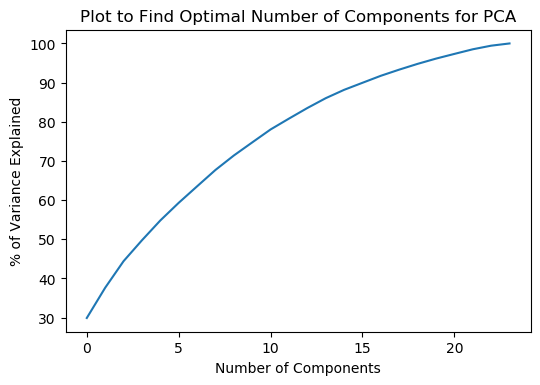

In [70]:
def PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
    plt.figure(dpi=100)
    plt.xlabel('Number of Components')
    plt.ylabel('% of Variance Explained')
    plt.title('Plot to Find Optimal Number of Components for PCA')
    plt.plot(var)
    return pca

N=len(data.columns)
X = data.values[:,0:N-1]
pca=PCA(X,N)

In [71]:
if (N>5):
    pca_new=decomposition.PCA(n_components=11)
    pca_new.fit(X)
    x_new=pca_new.transform(X)
    classe=data.get(data.columns[N-1])
    x_new_df=pd.DataFrame(x_new,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11'])
    y_new_df=pd.DataFrame(classe,columns=['Class'])
    final_data=pd.concat([x_new_df,y_new_df],axis=1)
else:
    final_data=data
    final_data.columns=['V1','V2','V3','V4','Class']
final_data
N=len(final_data.columns)

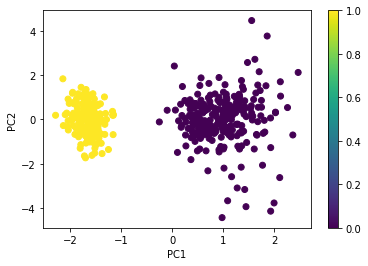

In [72]:
def plot_PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    Y_projected = pca.transform(Y_scaled)
    plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=data.get("Class"))
    plt.colorbar()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
plot_PCA(final_data,N)

## Data preparation 

In [66]:
path = './data/data_banknote_authentication.txt'
#target_name = 'target'
test_size= 0.3

In [4]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, test_size = test_size)

X_train : (959, 4)  y_train : (959,) X_test :  (412, 4) y test :  (412,)


In [5]:
from sklearn.preprocessing import label_binarize

y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

## Decision tree classification 

Let's first train a decision tree classifier with default parameters and evaluate it's preformance.

In [5]:
Decision_clf = m.DecisionTreeModel( train = True, X_train= X_train, y_train = y_train)

## Prediction and accuracy 

In [6]:
y_pred = m.predict(Decision_clf, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[219  20]
 [ 14 159]]
Accuracy :  91.74757281553399
Report : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       239
           1       0.89      0.92      0.90       173

   micro avg       0.92      0.92      0.92       412
   macro avg       0.91      0.92      0.92       412
weighted avg       0.92      0.92      0.92       412



## Cross validation

In [7]:
results = cross_validation(Decision_clf, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.9358140272929228


## Parameter tuning 

In [8]:
model = m.DecisionTreeModel( train = False)

In [9]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(1,10),
              'min_samples_leaf': range(1,10) } 

In [10]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    5.0s finished


In [11]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)

les meilleurs paramètres sont  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
les meilleur score est  0.9822732012513035
Confusion Matrix: 
 [[238   1]
 [  2 171]]
Accuracy :  99.27184466019418
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       239
           1       0.99      0.99      0.99       173

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



# Neural Networks 

## Improved Multilayer perceptron

In [12]:
MLP = m.build_MLP((4,))
history = m.train_nn(MLP,X_train, y_train, X_test, y_test, epochs = 20)

Train on 959 samples, validate on 412 samples
Epoch 1/20
959/959 [==============================] - 1s 838us/step - loss: 0.2852 - accuracy: 0.8749 - val_loss: 0.0745 - val_accuracy: 0.9733
Epoch 2/20
959/959 [==============================] - 0s 47us/step - loss: 0.0530 - accuracy: 0.9885 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 3/20
959/959 [==============================] - 0s 48us/step - loss: 0.0300 - accuracy: 0.9958 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 4/20
959/959 [==============================] - 0s 49us/step - loss: 0.0249 - accuracy: 0.9979 - val_loss: 0.0416 - val_accuracy: 0.9854
Epoch 5/20
959/959 [==============================] - 0s 48us/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 6/20
959/959 [==============================] - 0s 62us/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 7/20
959/959 [==============================] - 0s 64us/step - loss: 0.0094 - accuracy: 0

In [13]:
y_pred = m.predict(MLP, X_test)
accuracy(y_test, (y_pred>0.5).astype(float))

Confusion Matrix: 
 [[239   0]
 [  0 173]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       173

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [25]:
param_grid = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

In [26]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train,lambda : m.build_MLP((24,)), 
                                         param_grid ,scoring_fit = 'accuracy', is_keras_model = True 
                                        )

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.3min finished


In [27]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred)

les meilleurs paramètres sont  {'batch_size': 40, 'epochs': 200}
les meilleur score est  0.9964285714285714
Confusion Matrix: 
 [[78  3]
 [ 0 39]]
Accuracy :  97.5
Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.93      1.00      0.96        39

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [21]:
cross_validation( m.build_MLP((4,)), X,y, n_splits=3, **best_parameters)

Using Keras classifier
avg accuracy : 0.9096457163492838


array([0.83406115, 0.93654269, 0.95833331])

## CNN architecture

In [36]:
CNN = m.build_CNN(input_shape = (24,1))


# SVM

In [19]:
data_train = X_train, y_train
model = m.SVM( train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[81  0]
 [39  0]]
Accuracy :  67.5
Report : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        81
           1       0.00      0.00      0.00        39

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.40       120
weighted avg       0.46      0.68      0.54       120



C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
results = cross_validation(model, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.625


C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

No handles with labels found to put in legend.


les meilleurs paramètres sont  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
les meilleur score est  0.8107142857142857
Confusion Matrix: 
 [[73  8]
 [10 29]]
Accuracy :  85.0
Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        81
           1       0.78      0.74      0.76        39

    accuracy                           0.85       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120



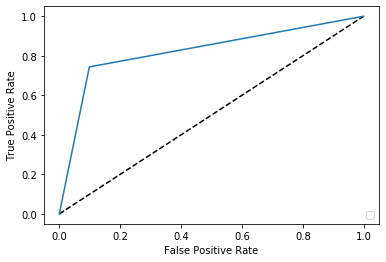

In [21]:
# defining parameter range 
model = m.SVM(train = False)
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000],  
              'gamma': [1, 0.1, 0.01,0.05, 0.001, 0.0001],
              'kernel': ['rbf']}  
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)
plot_roc(y_test,y_pred>0.5)


# Random Forest

In [22]:
data_train = X_train, y_train
model = m.RandomForest(max_depth = 2, train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[78  3]
 [ 1 38]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [23]:
results = cross_validation(model, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.97


In [24]:
model = m.RandomForest(train = False)
param_grid = {'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'random_state':[42]}
  
    

gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)


les meilleurs paramètres sont  {'max_depth': 6, 'n_estimators': 11, 'random_state': 42}
les meilleur score est  0.9928571428571429
Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Script for automation

In [9]:
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 

path = 
target_name =
test_size =
train =
epochs = 
batch_size = 


In [14]:
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 

models = {'MLP': {'build_fn':m.build_MLP((24,)),'params': param_grid_MLP},
          'Decision_tree' : { 'build_fn':m.DecisionTreeModel( train = False),'params': param_grid_Dt}         
         }
model_name = 'MLP'
finetune = True

model

In [15]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, target_name, test_size)
y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])



X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)


In [21]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *
from sklearn.preprocessing import label_binarize
import argparse

parser = argparse.ArgumentParser('Parameter tuning for classification on a defined dataset')
parser.add_argument('--path', type=str, default='none')
parser.add_argument('--target_name', type=str, default='Class')
parser.add_argument('--test_size', type=float, default=0.3)
parser.add_argument('--train', type=bool, default='true')
parser.add_argument('--batch_size', type=int, default=70)
parser.add_argument('--epochs', type=int, default=15)
parser.add_argument('--model_name', type=str, default='MLP')
parser.add_argument('--finetune', type=bool, default='false')


args = parser.parse_args()

path = args.path
target_name = args.target_name
test_size =args.test_size
train = args.train
epochs = args.epochs
batch_size = args.batch_size
model_name = args.model_name
finetune = model.finetune

df, X, y, X_train, X_test, y_train, y_test = load_data(path, target_name, test_size)
y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

models = {'MLP': {'build_fn':lambda : m.build_MLP((24,)),'params': param_grid_MLP},
          'Decision_tree' : { 'build_fn':m.DecisionTreeModel( train = False),'params': param_grid_Dt}         
         }
param_grid_MLP = {
              'epochs':[5, 10, 15 ],
              'batch_size':[ 70, 50, 60, 40],
              
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }
param_grid_Dt = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(3,14),
              'min_samples_leaf': range(3,4) } 


if finetune :
    
    model = models[model_name]['build_fn']
    param_grid = models[model_name]['params']
    gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train,  model, param_grid ,scoring_fit = 'accuracy', is_keras_model = True )
    best_parameters = get_best_parameters(gs )
    y_pred = m.predict(fitted_model, X_test)
    accuracy(y_test, y_pred>0.5)
    results = cross_validation( model, X,y, n_splits=10, is_keras_model = True,  **best_parameters)

             
             



X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.0min finished


les meilleurs paramètres sont  {'batch_size': 40, 'epochs': 10}
les meilleur score est  0.9892857142857143
Confusion Matrix: 
 [[81  0]
 [ 1 38]]
Accuracy :  99.16666666666667
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

avg accuracy : 0.9925000011920929


In [1]:
!python3 classify.py --path './data/preprocessed.csv' --model_name 'MLP' --finetune True

Using TensorFlow backend.
X_train : (280, 24)  y_train : (280,) X_test :  (120, 24) y test :  (120,)
2019-12-02 00:53:23.172335: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:53:23.183991: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9aa4b5c710 executing computations on platform Host. Devices:
2019-12-02 00:53:23.184012: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
Fitting 10 folds for each of 12 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
Using TensorFlow backend.
2019-12-02 00:53:27.780824: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:53:27.7808

[CV] ......................... batch_size=70, epochs=15, total=   3.9s
[CV] ......................... batch_size=70, epochs=15, total=   3.6s
[CV] batch_size=70, epochs=15 ........................................
Using TensorFlow backend.
Using TensorFlow backend.
[CV] ......................... batch_size=70, epochs=15, total=   4.0s
[CV] ......................... batch_size=70, epochs=15, total=   3.8s
2019-12-02 00:54:02.826044: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:54:02.844904: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f80a223d710 executing computations on platform Host. Devices:
2019-12-02 00:54:02.844976: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
[CV] batch_size=70, epochs=15 ........................................
Using TensorFlow backend.
2019-12-02 00:54:03.654203: I tensorfl

[CV] batch_size=50, epochs=15 ........................................
Using TensorFlow backend.
2019-12-02 00:54:37.170615: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:54:37.190228: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe1cd6ba380 executing computations on platform Host. Devices:
2019-12-02 00:54:37.190252: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
[CV] batch_size=50, epochs=15 ........................................
Using TensorFlow backend.
2019-12-02 00:54:39.840214: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:54:39.861321: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb4e8ee3070 executing computations on platform Host. Devices:
2019-12-02 00:54:39

[CV] batch_size=60, epochs=10 ........................................
[CV] batch_size=60, epochs=10 ........................................
2019-12-02 00:55:16.078498: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:55:16.095793: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f96b3f7b3d0 executing computations on platform Host. Devices:
2019-12-02 00:55:16.095819: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
[CV] batch_size=60, epochs=10 ........................................
[CV] ......................... batch_size=60, epochs=10, total=   3.4s
[CV] batch_size=60, epochs=15 ........................................
[CV] ......................... batch_size=60, epochs=10, total=   3.6s
[CV] ......................... batch_size=60, epochs=10, total=   3.6s
[CV] batch_size=60, epochs=15 ...............

2019-12-02 00:56:03.814578: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-02 00:56:03.846014: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f879bba6c70 executing computations on platform Host. Devices:
2019-12-02 00:56:03.846096: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
[CV] batch_size=40, epochs=10 ........................................
[CV] batch_size=40, epochs=10 ........................................
[CV] ......................... batch_size=40, epochs=10, total=   5.2s
[CV] batch_size=40, epochs=15 ........................................
[CV] ......................... batch_size=40, epochs=10, total=   5.4s
[CV] batch_size=40, epochs=15 ........................................
[CV] ......................... batch_size=40, epochs=10, total=   5.7s
[CV] ......................... batch_size=40,

In [29]:
results

array([1.        , 0.97500002, 1.        , 1.        , 1.        ,
       0.94999999, 1.        , 1.        , 1.        , 1.        ])